####  Frequency chaos game representation matrix

The Chaos Game Representation (CGR) for DNA utilizes a square with vertices that represent the four nucleotides: guanine (G), thymine (T), adenine (A), and cytosine (C). These vertices are positioned at coordinates (-1, -1), (-1, 1), (1, -1), and (1, 1), respectively, as shown in Fig. (a). In this figure (a), the walker's path for the DNA sequence GTCA is depicted. Starting at the origin, the walker moves halfway towards G, then continues to move halfway towards each subsequent nucleotide, using the new halfway point as the starting point each time, until the entire sequence is processed.

Subsequently, depending on the user-selected $k$-mer length ($k$), the ranges of $x = (-1, 1)$ and $y = (-1, 1)$ are divided into a $2^k \times 2^k$ grid. Each cell in this grid corresponds to one $k$-mer of length $k$, as illustrated in Fig. (b). This grid, which labels each cell with a specific $k$-mer, is referred to as the $k$-mer key matrix in this paper. The Frequency Chaos Game Representation (FCGR) matrix is then generated by counting the occurrences of each $k$-mer in the DNA sequence, determined by the frequency with which the walker visits each cell during its traversal.

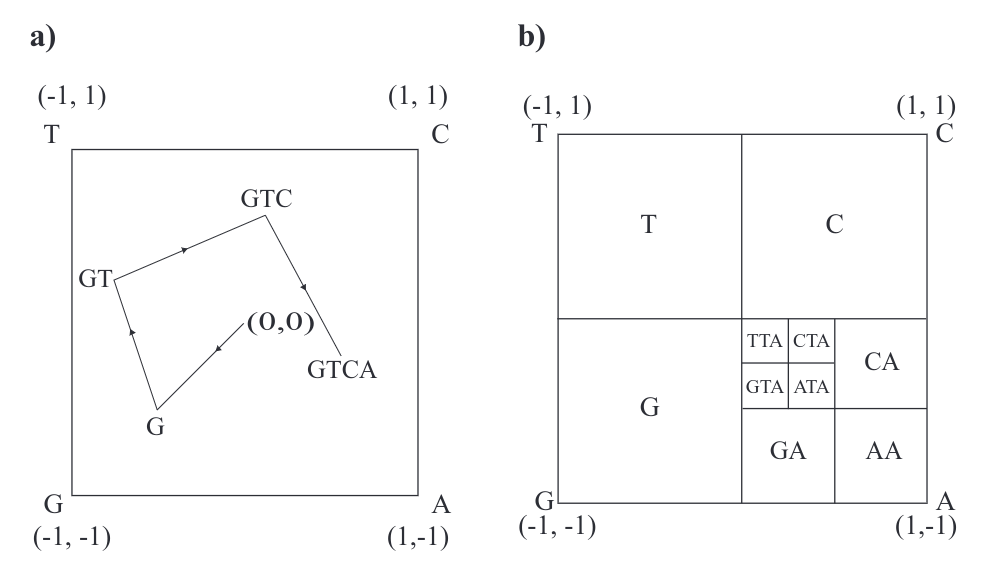







##### install fcgr package

In [3]:
!pip install fcgr-0.1-py3-none-any.whl

Processing ./fcgr-0.1-py3-none-any.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/workspaces/FCGR/tutorial/fcgr-0.1-py3-none-any.whl'



##### import library

In [15]:
import fcgr
import matplotlib.pyplot as plt

##### Reads a FASTA file at the given `file_path` and concatenates the sequences into a single string.


Parameters:

    file_path (str): The path to the FASTA file.

Returns:

    str: Concatenated DNA sequence from the FASTA file.

In [5]:
help(fcgr.read_fasta)

Help on function read_fasta in module fcgr:

read_fasta(file_path: str)
    Reads a FASTA file at the given `file_path` and concatenates the sequences into a single string.

    Parameters:
        file_path (str): The path to the FASTA file.

    Returns:
        str: Concatenated DNA sequence from the FASTA file.



In [36]:
file_path = "adenovirus.fasta"
fasta_seq_adenovirus = fcgr.read_fasta(file_path)
print(fasta_seq_adenovirus)

file_path = "ebola.fasta"
fasta_seq_ebola = fcgr.read_fasta(file_path)
print(fasta_seq_ebola)

file_path = "ebola2.fasta"
fasta_seq_ebola2 = fcgr.read_fasta(file_path)
print(fasta_seq_ebola2)

AATAATATACCTTAAAGCTGGAAACGAGCCAATATGATAATGAGTGAGGAGGGGCTAGGGGTGGTGCGAAGTGACGTATACGTAGGCGGGGTGGGAAAGGGTGGAGGTGAATGACGTTGGGGTCGAAGGTTGGGGAGTGGCGCGGCGGAAGTGACGGATCCGGTAGTATGTTTTGACCGGAAATTTGGTGTATTGGGCGGGTTTTTGTAACTTTTTGGTTATTTTGGCGCGAAAACTGAGTAATGCGGAAGTTGAACGAACTCTGGACTTTTTATGGCTAGGGAGGGAAAACTGCTGATCATTGCTGAACTTTGGGGCTTTGACGTGGCGGTTTCCCTACGTGGCACTGCCACGCGAATGCTCAAAGTCCTTATTTTATTGTGTGTTCAGCCCTTTTGAGGGTATTTAAACACAGCCAGAACGTCAAGAGGCCACTCTTGAGTGCCAGCGAGTAGAGTTTTCTCCTCCGTTGCCGCCGAGATGAGAATGCTGCCGGACTTCTTCACCGGGAACTGGGATGACATGTTCCAGGGGCTGCTGGAGGCTGAGCATCTGTTTGATTTTCCTGAACCTTCTCAGGCTTTTGAAGAGATTTCGCTTCACAATCTTTTTGATGTGGAGCTGGATGAGTCTGAAGGGGATCCGAATGAGGAAGCGGTAGATGGTATGTTTCCTAACTGGATGCTGTCCGAGGACCACAGTGCTGACAGTGGTGCGGCTTCGGGCGATTCTGGGGTTGGAGAAGACCTGGTGGAGGTTAATTTGGACTTGAAATGCTATGAAGAGGGTTTGCCTCCTAGCGGCTCGGAGGCTGATGAAGCTGAAGAACGAGCGGAGGAGGAAGAGACGGCTGTGTCGAATTATGTGAATATTGCTGAGGGTGCTAGTCAGCTGGTGTTGGACTGTCCAGAAAACCCGGGACGAGGTTGTCGGGCTTGTGATTTTCATCGGGGCTCTAGTGGAAATCCTGAAGCTATGTGTGCTTTATGTTACATGCGTC

##### Define dummy fasta sequence

In [6]:
fasta_seq_dummy  = "ATTGCNATRATTT" 

##### Frequency chaos game kmer matrix key

Parameters:

    kmer_length (int): The length of the k-mer.

Returns:

    np.ndarray: A 2D numpy array representing the key matrix for CGR.

In [7]:
help(fcgr.chaos_game_representation_key)

Help on function chaos_game_representation_key in module fcgr:

chaos_game_representation_key(kmer_length: int)
    Generates the key matrix for Chaos Game Representation (CGR) for the given k-mer length.
    
    Parameters:
        kmer_length (int): The length of the k-mer.
    
    Returns:
        np.ndarray: A 2D numpy array representing the key matrix for CGR.



In [9]:
chaos_game_kmer_array = fcgr.chaos_game_representation_key(kmer_length=3)
chaos_game_kmer_array

array([['TTT', 'CTT', 'TCT', 'CCT', 'TTC', 'CTC', 'TCC', 'CCC'],
       ['GTT', 'ATT', 'GCT', 'ACT', 'GTC', 'ATC', 'GCC', 'ACC'],
       ['TGT', 'CGT', 'TAT', 'CAT', 'TGC', 'CGC', 'TAC', 'CAC'],
       ['GGT', 'AGT', 'GAT', 'AAT', 'GGC', 'AGC', 'GAC', 'AAC'],
       ['TTG', 'CTG', 'TCG', 'CCG', 'TTA', 'CTA', 'TCA', 'CCA'],
       ['GTG', 'ATG', 'GCG', 'ACG', 'GTA', 'ATA', 'GCA', 'ACA'],
       ['TGG', 'CGG', 'TAG', 'CAG', 'TGA', 'CGA', 'TAA', 'CAA'],
       ['GGG', 'AGG', 'GAG', 'AAG', 'GGA', 'AGA', 'GAA', 'AAA']],
      dtype='<U3')

##### Returns the index of a specific k-mer in the FCGR key matrix.

Parameters:
        
        kmer (str): The k-mer for which the index is to be found.

Returns:

        tuple: The row and column indices of the k-mer in the CGR key matrix.

In [9]:
help(fcgr.return_kmer_index)

Help on function return_kmer_index in module fcgr:

return_kmer_index(kmer: str)
    Returns the index of a specific k-mer in the Chaos Game Representation (CGR) key matrix.
    
    Parameters:
        kmer (str): The k-mer for which the index is to be found.
    
    Returns:
        tuple: The row and column indices of the k-mer in the CGR key matrix.



In [10]:
fcgr.return_kmer_index(kmer = "AAA")

(7, 7)

##### Returns the k-mer at the specified index in the CFCGR kmer key matrix.

Parameters:

    kmer_length (int): The length of the k-mer used to generate the FCGR key matrix.
    tuple_index (tuple): The index (row, column) of the k-mer in the matrix.

Returns:

    str: The k-mer at the specified index.

In [11]:
help(fcgr.return_kmer_at_index)

Help on function return_kmer_at_index in module fcgr:

return_kmer_at_index(kmer_length: int, tuple_index: tuple)
    Returns the k-mer at the specified index in the Chaos Game Representation (CGR) key matrix.
    
    Parameters:
        kmer_length (int): The length of the k-mer used to generate the Chaos Game Representation matrix.
        tuple_index (tuple): The index (row, column) of the k-mer in the matrix.
    
    Returns:
        str: The k-mer at the specified index.



In [12]:
fcgr.return_kmer_at_index(kmer_length=3, tuple_index=(7, 0))

The kmer at index (7, 0) with kmer size 3 is GGG.


'GGG'

##### Generates the FCGR matrix for the given DNA sequence.

This function calculates the FCGR matrix for a given DNA sequence and k-mer length,
using the FCGR kmer key matrix.

Parameters:

    fasta_string (str): The DNA sequence in FASTA format.
    kmer_length (int): The length of the k-mers to consider.
    chaos_game_kmer_array (np.array, optional): The FCGR kmer key matrix. Defaults to None.
    pseudo_count (bool, optional): Whether to add pseudo-counts of 1 to each element the matrix. Defaults to True.

Returns:

    tuple: A tuple containing:
        - np.array: The chaos frequency matrix representing k-mer frequencies.
        - np.array: The FCGR kmer key matrix used.

In [13]:
help(fcgr.chaos_frequency_matrix)

Help on function chaos_frequency_matrix in module fcgr:

chaos_frequency_matrix(fasta_string: str, kmer_length: int, chaos_game_kmer_array: <built-in function array> = None, pseudo_count=True)
    Generates the chaos frequency matrix for the given DNA sequence.
    
    This function calculates the Chaos Frequency Matrix (CFM) for a given DNA sequence and k-mer length,
    using the Chaos Game Representation (CGR) key matrix.
    
    Parameters:
        fasta_string (str): The DNA sequence in FASTA format.
        kmer_length (int): The length of the k-mers to consider.
        chaos_game_kmer_array (np.array, optional): The Chaos Game Representation (CGR) key matrix. Defaults to None.
        pseudo_count (bool, optional): Whether to apply pseudo-counts to the matrix. Defaults to True.
    
    Returns:
        tuple: A tuple containing:
            - np.array: The chaos frequency matrix representing k-mer frequencies.
            - np.array: The Chaos Game Representation (CGR) key m

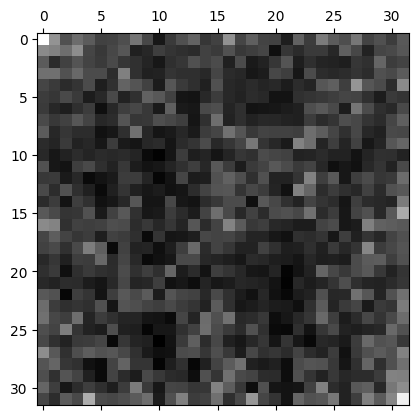

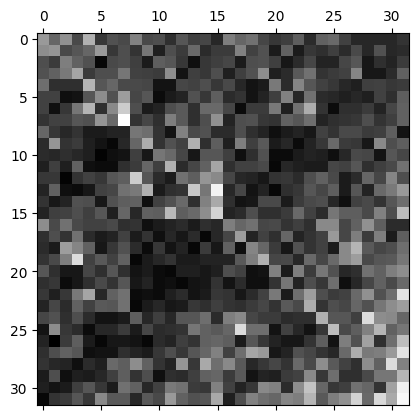

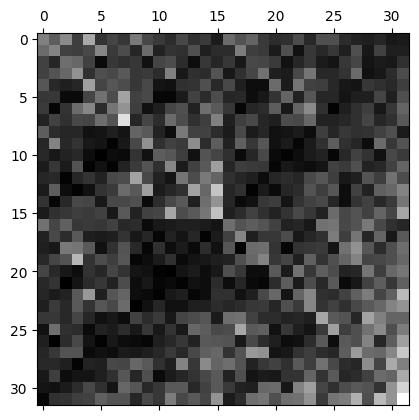

In [40]:
kmer_length = 5

fcgr_freq_matrix, fcgr_key_array = fcgr.chaos_frequency_matrix(fasta_string= fasta_seq_adenovirus, kmer_length= kmer_length, chaos_game_kmer_array=None,  pseudo_count = False)
fcgr_freq_matrix
plt.matshow(fcgr_freq_matrix, cmap='gray')

fcgr_freq_matrix, fcgr_key_array = fcgr.chaos_frequency_matrix(fasta_string= fasta_seq_ebola, kmer_length= kmer_length, chaos_game_kmer_array=None,  pseudo_count = False)
fcgr_freq_matrix
plt.matshow(fcgr_freq_matrix, cmap='gray')

fcgr_freq_matrix, fcgr_key_array = fcgr.chaos_frequency_matrix(fasta_string= fasta_seq_ebola2, kmer_length= kmer_length, chaos_game_kmer_array=None,  pseudo_count = False)
fcgr_freq_matrix
plt.matshow(fcgr_freq_matrix, cmap='gray')

##### Calculate the frequency dictionary of k-mers

Parameters:

    - fasta_string (str): The input DNA sequence in FASTA format.
    - kmer_length (int): The length of k-mers.
    - chaos_game_kmer_array (np.array): Chaos game k-mer array if pre-calculated, otherwise None.
    - pseudo_count (bool): Whether to apply pseudo-count (Laplace smoothing) or not. Default is True.

Returns:

    - frequency_dictionary (dict): A dictionary containing k-mers as keys and their frequencies as values.

In [15]:
help(fcgr.chaos_frequency_dictionary)

Help on function chaos_frequency_dictionary in module fcgr:

chaos_frequency_dictionary(fasta_string: str, kmer_length: int, chaos_game_kmer_array: <built-in function array> = None, pseudo_count=True)
    Calculate the frequency dictionary of k-mers in a chaos game representation matrix.
    
    Parameters:
        - fasta_string (str): The input DNA sequence in FASTA format.
        - kmer_length (int): The length of k-mers.
        - chaos_game_kmer_array (np.array): Chaos game k-mer array if pre-calculated, otherwise None.
        - pseudo_count (bool): Whether to apply pseudo-count (Laplace smoothing) or not. Default is True.
    
    Returns:
        - frequency_dictionary (dict): A dictionary containing k-mers as keys and their frequencies as values.



In [16]:
fcgr.chaos_frequency_dictionary(fasta_string= fasta_seq_dummy, kmer_length=3, chaos_game_kmer_array=chaos_game_kmer_array, pseudo_count = False)

{'TTT': 1.0,
 'CTT': 0.0,
 'TCT': 0.0,
 'CCT': 0.0,
 'TTC': 0.0,
 'CTC': 0.0,
 'TCC': 0.0,
 'CCC': 0.0,
 'GTT': 0.0,
 'ATT': 2.0,
 'GCT': 0.0,
 'ACT': 0.0,
 'GTC': 0.0,
 'ATC': 0.0,
 'GCC': 0.0,
 'ACC': 0.0,
 'TGT': 0.0,
 'CGT': 0.0,
 'TAT': 0.0,
 'CAT': 0.0,
 'TGC': 1.0,
 'CGC': 0.0,
 'TAC': 0.0,
 'CAC': 0.0,
 'GGT': 0.0,
 'AGT': 0.0,
 'GAT': 0.0,
 'AAT': 0.0,
 'GGC': 0.0,
 'AGC': 0.0,
 'GAC': 0.0,
 'AAC': 0.0,
 'TTG': 1.0,
 'CTG': 0.0,
 'TCG': 0.0,
 'CCG': 0.0,
 'TTA': 0.0,
 'CTA': 0.0,
 'TCA': 0.0,
 'CCA': 0.0,
 'GTG': 0.0,
 'ATG': 0.0,
 'GCG': 0.0,
 'ACG': 0.0,
 'GTA': 0.0,
 'ATA': 0.0,
 'GCA': 0.0,
 'ACA': 0.0,
 'TGG': 0.0,
 'CGG': 0.0,
 'TAG': 0.0,
 'CAG': 0.0,
 'TGA': 0.0,
 'CGA': 0.0,
 'TAA': 0.0,
 'CAA': 0.0,
 'GGG': 0.0,
 'AGG': 0.0,
 'GAG': 0.0,
 'AAG': 0.0,
 'GGA': 0.0,
 'AGA': 0.0,
 'GAA': 0.0,
 'AAA': 0.0}

##### Calculate the count of a specific k-mer in a given DNA sequence.

Parameters:

    - key_name (str): The k-mer sequence for which the count is to be calculated.
    - fasta_content (str): The input DNA sequence in which the k-mer count is to be calculated.

Returns:

    - count (int): The count of the specified k-mer in the DNA sequence.


In [17]:
help(fcgr.return_kmer_count_individual)

Help on function return_kmer_count_individual in module fcgr:

return_kmer_count_individual(key_name: str, fasta_content: str)
    Calculate the count of a specific k-mer in a given DNA sequence.
    
    Parameters:
        - key_name (str): The k-mer sequence for which the count is to be calculated.
        - fasta_content (str): The input DNA sequence in which the k-mer count is to be calculated.
    
    Returns:
        - count (int): The count of the specified k-mer in the DNA sequence.



In [18]:
fcgr.return_kmer_count_individual(key_name = "ATT", fasta_content =fasta_seq_dummy)

2